In [13]:
# Comparison for specific event for the two outage datasets

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import matplotlib.dates as mdates
import platform

In [2]:
# Environment/Package version logging for reproducibility.
# This cell logs the current environment and Python package versions for transparency and reproducibility.
print(f"Python Version: {platform.python_version()}")
print(f"Pandas Version: {pd.__version__}")
print(f"Matplotlib Version: {matplotlib.__version__}")


Python Version: 3.10.19
Pandas Version: 2.3.3
Matplotlib Version: 3.10.8


In [5]:
# Get the base directory (current working directory)
base_dir = os.getcwd()

In [7]:
# Set relative paths
eaglei_combined_NERC_path = os.path.abspath(os.path.join(base_dir, "..", "..", "data", "Output", "eaglei_NERC_time_adjusted.csv"))
IEEE_path = os.path.abspath(os.path.join(base_dir, "..", "..", "data", "IEEE", "combined.csv"))

In [9]:
# Read in IEEE dataset & aggregate to NERC-level
if not os.path.exists(IEEE_path):
    raise FileNotFoundError(f"Error: IEEE data file not found at: {IEEE_path}")
IEEE = pd.read_csv(IEEE_path)
IEEE_NERC = IEEE.groupby(['NERC', 'Date']).agg({
    'CI': lambda x: x.sum(skipna=True),
    'CMI': lambda x: x.sum(skipna=True)
}).reset_index()
IEEE_NERC.loc[IEEE_NERC['NERC'] == "SPP RE", "NERC"] = "SPP" # Rename to match with eaglei-i

In [10]:
# Raed in EAGLE-I dataset at NERC-level
if not os.path.exists(eaglei_combined_NERC_path):
    raise FileNotFoundError(f"Error: EAGLE-I combined NERC data file not found at: {eaglei_combined_NERC_path}")
eaglei = pd.read_csv(eaglei_combined_NERC_path)

In [11]:
# Construct data frame for storm uri
eaglei_uri = eaglei.loc[(eaglei['NERC'] == "SPP") & (eaglei['Date'] >= "2021-02-10") &  (eaglei['Date'] <= "2021-02-20")]
IEEE_uri = IEEE_NERC.loc[(IEEE_NERC['NERC'] == "SPP") & (IEEE_NERC['Date'] >= "2021-02-10") &  (IEEE_NERC['Date'] <= "2021-02-20")]
uri_merged = pd.merge(IEEE_uri, eaglei_uri, on = ["Date", "NERC"], how = "inner")

In [12]:
# Construct data frame for 2021 PNW heat wave
eaglei_pnw = eaglei.loc[(eaglei['NERC'] == "WECC") & (eaglei['Date'] >= "2021-06-23") &  (eaglei['Date'] <= "2021-07-04")]
IEEE_pnw = IEEE_NERC.loc[(IEEE_NERC['NERC'] == "WECC") & (IEEE_NERC['Date'] >= "2021-06-23") &  (IEEE_NERC['Date'] <= "2021-07-04")]
pnw_merged = pd.merge(IEEE_pnw, eaglei_pnw, on = ["Date", "NERC"], how = "inner")

In [13]:
# Construct data frame for 2017 bomb cyclone
eaglei_derecho = eaglei.loc[(eaglei['NERC'] == "NPCC") & (eaglei['Date'] >= "2018-05-12") &  (eaglei['Date'] <= "2018-05-21")]
IEEE_derecho = IEEE_NERC.loc[(IEEE_NERC['NERC'] == "NPCC") & (IEEE_NERC['Date'] >= "2018-05-12") &  (IEEE_NERC['Date'] <= "2018-05-21")]
derecho_merged = pd.merge(IEEE_derecho, eaglei_derecho, on = ["Date", "NERC"], how = "inner")

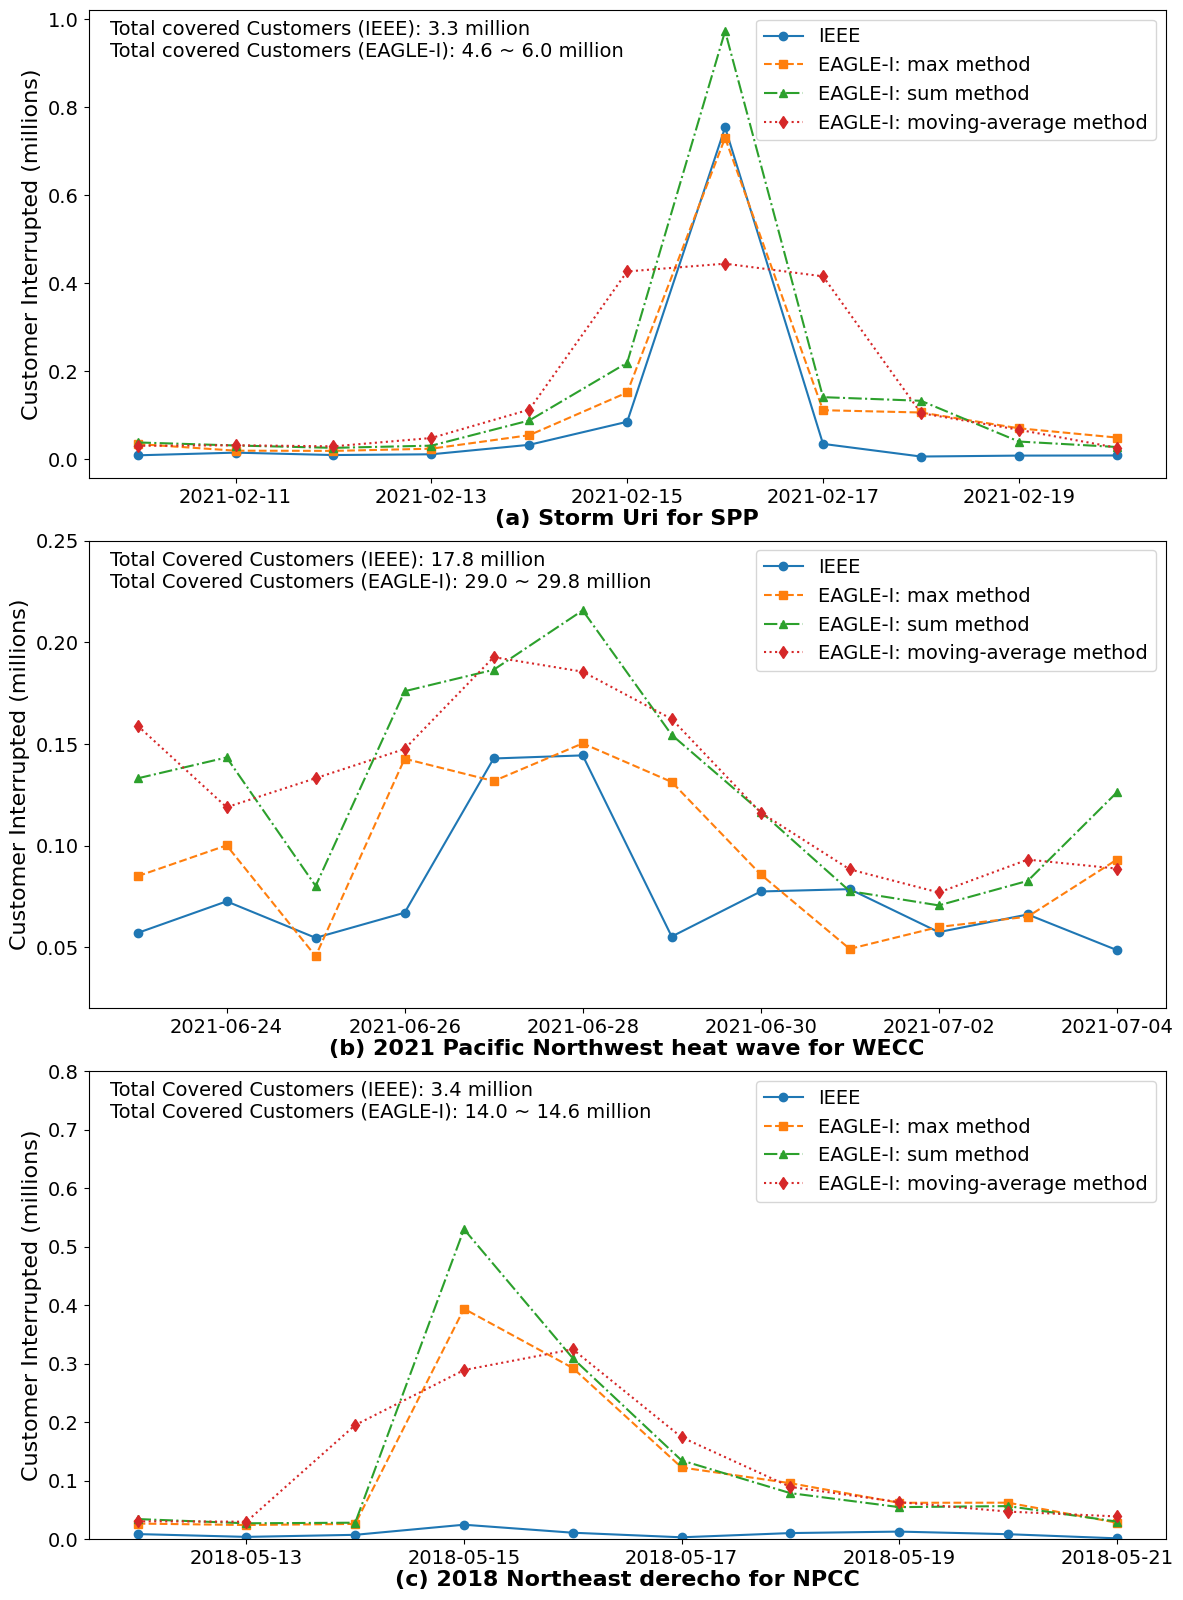

In [14]:
# Plot the customers Interrputed

# Convert Date columns to datetime
uri_merged['Date'] = pd.to_datetime(uri_merged['Date'])
pnw_merged['Date'] = pd.to_datetime(pnw_merged['Date'])
derecho_merged['Date'] = pd.to_datetime(derecho_merged['Date'])
derecho_merged['Date'] = pd.to_datetime(derecho_merged['Date'])

# Create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 16), sharex=False)

# Plot for uri_merged (top subplot)
ax1.plot(uri_merged['Date'], uri_merged['CI']/1000000, label='IEEE', marker='o', linestyle='-', linewidth=1.5)
ax1.plot(uri_merged['Date'], uri_merged['max_customer']/1000000, label='EAGLE-I: max method', marker='s', linestyle='--', linewidth=1.5)
ax1.plot(uri_merged['Date'], uri_merged['daily_ci']/1000000, label='EAGLE-I: sum method', marker='^', linestyle='-.', linewidth=1.5)
ax1.plot(uri_merged['Date'], uri_merged['daily_ci_3day_avg']/1000000, label='EAGLE-I: moving-average method', marker='d', linestyle=':', linewidth=1.5)

# Customize the x-axis for uri_merged
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.tick_params(axis='both', which='major', labelsize=14)

# Set y-axis range for uri_merged
# ax1.set_ylim(0, 10)

# Customize the plot for uri_merged
# ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Customer Interrupted (millions)', fontsize=16)
ax1.legend(fontsize=14, loc='upper right')
ax1.text(0.02, 0.98, 
         'Total covered Customers (IEEE): 3.3 million\nTotal covered Customers (EAGLE-I): 4.6 ~ 6.0 million',
         transform=ax1.transAxes,
         fontsize=14,
         verticalalignment='top',
         horizontalalignment='left')
ax1.text(0.5, -0.1, '(a) Storm Uri for SPP', transform=ax1.transAxes, fontsize=16, fontweight='bold', ha='center')

# Plot for pnw_merged (bottom subplot)
ax2.plot(pnw_merged['Date'], pnw_merged['CI']/1000000, label='IEEE', marker='o', linestyle='-', linewidth=1.5)
ax2.plot(pnw_merged['Date'], pnw_merged['max_customer']/1000000, label='EAGLE-I: max method', marker='s', linestyle='--', linewidth=1.5)
ax2.plot(pnw_merged['Date'], pnw_merged['daily_ci']/1000000, label='EAGLE-I: sum method', marker='^', linestyle='-.', linewidth=1.5)
ax2.plot(pnw_merged['Date'], pnw_merged['daily_ci_3day_avg']/1000000, label='EAGLE-I: moving-average method', marker='d', linestyle=':', linewidth=1.5)

# Customize the x-axis for pnw_merged
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax2.tick_params(axis='both', which='major', labelsize=14)

# Set y-axis range for pnw_merged
ax2.set_ylim(0.02, 0.25)

# Customize the plot for pnw_merged
# ax2.set_xlabel('Date', fontsize=16)
ax2.set_ylabel('Customer Interrupted (millions)', fontsize=16)
ax2.legend(fontsize=14)
ax2.text(0.02, 0.98, 
         'Total Covered Customers (IEEE): 17.8 million\nTotal Covered Customers (EAGLE-I): 29.0 ~ 29.8 million',
         transform=ax2.transAxes,
         fontsize=14,
         verticalalignment='top',
         horizontalalignment='left')
ax2.text(0.5, -0.1, '(b) 2021 Pacific Northwest heat wave for WECC', transform=ax2.transAxes, fontsize=16, fontweight='bold', ha='center')

# Plot for cyclone_merged (bottom subplot)
ax3.plot(derecho_merged['Date'], derecho_merged['CI'] / 1000000, label='IEEE', marker='o', linestyle='-', linewidth=1.5)
ax3.plot(derecho_merged['Date'], derecho_merged['max_customer'] / 1000000, label='EAGLE-I: max method', marker='s', linestyle='--', linewidth=1.5)
ax3.plot(derecho_merged['Date'], derecho_merged['daily_ci'] / 1000000, label='EAGLE-I: sum method', marker='^', linestyle='-.', linewidth=1.5)
ax3.plot(derecho_merged['Date'], derecho_merged['daily_ci_3day_avg'] / 1000000, label='EAGLE-I: moving-average method', marker='d', linestyle=':', linewidth=1.5)

# Customize x-axis for cyclone_merged
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax3.tick_params(axis='both', which='major', labelsize=14)

# Set y-axis range for cyclone_merged
ax3.set_ylim(0, 0.8)

# Customize the plot for cyclone_merged
# ax3.set_xlabel('Date', fontsize=16)
ax3.set_ylabel('Customer Interrupted (millions)', fontsize=16)
ax3.legend(fontsize=14)
ax3.text(0.02, 0.98,
         'Total Covered Customers (IEEE): 3.4 million\nTotal Covered Customers (EAGLE-I): 14.0 ~ 14.6 million',
         transform=ax3.transAxes,
         fontsize=14,
         verticalalignment='top',
         horizontalalignment='left')
ax3.text(0.5, -0.1, '(c) 2018 Northeast derecho for NPCC', transform=ax3.transAxes, fontsize=16, fontweight='bold', ha='center')

plt.tight_layout()

# Show the plot
plt.show()

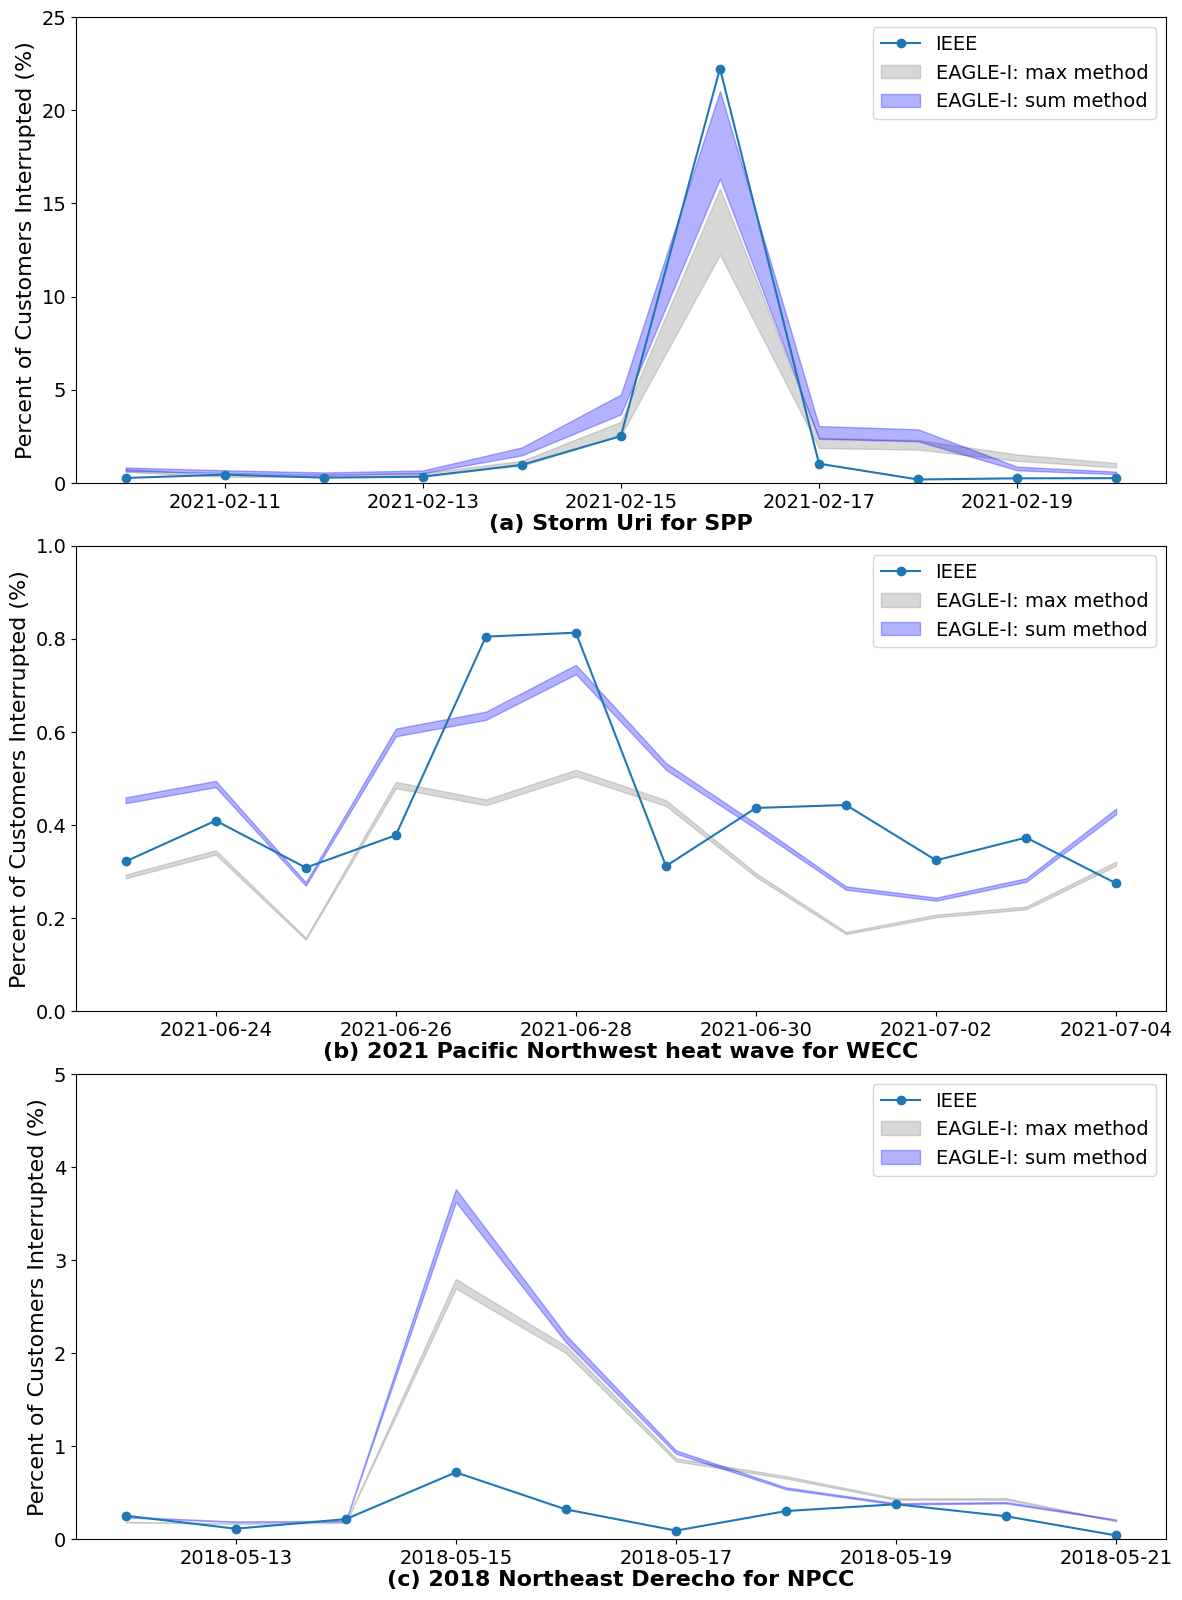

In [15]:
# Plot the percent of customers impacted 

# Define total customer counts for each subregion
ieee_total_customers_uri = 3389033  # IEEE total customers for Uri (SPP)
eagle_min_customers_uri = 4622632  # EAGLE-I minimum total customers for Uri (SPP)
eagle_max_customers_uri = 5957545  # EAGLE-I maximum total customers for Uri (SPP)

ieee_total_customers_pnw = 17765934  # IEEE total customers for PNW heat wave (WECC)
eagle_min_customers_pnw = 28995003  # EAGLE-I minimum total customers for PNW heat wave (WECC)
eagle_max_customers_pnw = 29809029  # EAGLE-I maximum total customers for PNW heat wave (WECC)

ieee_total_customers_derecho = 3437647  # IEEE total customers for derecho (NPCC)
eagle_min_customers_derecho = 14083833  # EAGLE-I minimum total customers for derecho (NPCC)
eagle_max_customers_derecho = 14618891  # EAGLE-I maximum total customers for derecho (NPCC)

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 16), sharex=False)

# --- Plot for Uri (TRE) ---
# IEEE
ax1.plot(uri_merged['Date'], uri_merged['CI'] / ieee_total_customers_uri * 100, 
         label='IEEE', marker='o', linestyle='-', linewidth=1.5)
# EAGLE-I ranges
ax1.fill_between(uri_merged['Date'],
                 uri_merged['max_customer'] / eagle_min_customers_uri * 100,
                 uri_merged['max_customer'] / eagle_max_customers_uri * 100,
                 color='grey', alpha=0.3, label='EAGLE-I: max method')
ax1.fill_between(uri_merged['Date'],
                 uri_merged['daily_ci'] / eagle_min_customers_uri * 100,
                 uri_merged['daily_ci'] / eagle_max_customers_uri * 100,
                 color='blue', alpha=0.3, label='EAGLE-I: sum method')

# Customize the axes and layout
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.set_ylim(0, 25)
ax1.set_ylabel('Percent of Customers Interrupted (%)', fontsize=16)
ax1.legend(fontsize=14, loc='upper right')
ax1.text(0.5, -0.1, '(a) Storm Uri for SPP', transform=ax1.transAxes, fontsize=16, fontweight='bold', ha='center')

# --- Plot for PNW (WECC) ---
# IEEE
ax2.plot(pnw_merged['Date'], pnw_merged['CI'] / ieee_total_customers_pnw * 100, 
         label='IEEE', marker='o', linestyle='-', linewidth=1.5)
# EAGLE-I ranges
ax2.fill_between(pnw_merged['Date'],
                 pnw_merged['max_customer'] / eagle_min_customers_pnw * 100,
                 pnw_merged['max_customer'] / eagle_max_customers_pnw * 100,
                 color='grey', alpha=0.3, label='EAGLE-I: max method')
ax2.fill_between(pnw_merged['Date'],
                 pnw_merged['daily_ci'] / eagle_min_customers_pnw * 100,
                 pnw_merged['daily_ci'] / eagle_max_customers_pnw * 100,
                 color='blue', alpha=0.3, label='EAGLE-I: sum method')

# Customize the axes and layout
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.set_ylim(0, 1)  # Adjust accordingly for WECC region
ax2.set_ylabel('Percent of Customers Interrupted (%)', fontsize=16)
ax2.legend(fontsize=14)
ax2.text(0.5, -0.1, '(b) 2021 Pacific Northwest heat wave for WECC', transform=ax2.transAxes, fontsize=16, fontweight='bold', ha='center')

# --- Plot for Derecho (NPCC) ---
# IEEE
ax3.plot(derecho_merged['Date'], derecho_merged['CI'] / ieee_total_customers_derecho * 100, 
         label='IEEE', marker='o', linestyle='-', linewidth=1.5)
# EAGLE-I ranges
ax3.fill_between(derecho_merged['Date'],
                 derecho_merged['max_customer'] / eagle_min_customers_derecho * 100,
                 derecho_merged['max_customer'] / eagle_max_customers_derecho * 100,
                 color='grey', alpha=0.3, label='EAGLE-I: max method')
ax3.fill_between(derecho_merged['Date'],
                 derecho_merged['daily_ci'] / eagle_min_customers_derecho * 100,
                 derecho_merged['daily_ci'] / eagle_max_customers_derecho * 100,
                 color='blue', alpha=0.3, label='EAGLE-I: sum method')

# Customize the axes and layout
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax3.tick_params(axis='both', which='major', labelsize=14)
ax3.set_ylim(0, 5)  # Adjust accordingly for NPCC region
ax3.set_ylabel('Percent of Customers Interrupted (%)', fontsize=16)
ax3.legend(fontsize=14)
ax3.text(0.5, -0.1, '(c) 2018 Northeast Derecho for NPCC', transform=ax3.transAxes, fontsize=16, fontweight='bold', ha='center')

# Final touches and show plot
plt.tight_layout()
plt.show()